# Checkpoint Objective
Logistic Regression:

In this checkpoint, we are going to work  on the heart disease dataset , this time we will use logistic regression to predict if a patient will have TenyearsCHD 

1. Apply logistic regression. 

2. Use a confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

In [1]:
#we're going to import our data first
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("logistic_regression_dataset.csv")
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [3]:
#checking for missig values
df.isnull().sum() 

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [4]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,3390.000000
mean,2118.500000,49.584946,1.978950,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.150737
std,1223.549549,8.572160,1.019791,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1059.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,2118.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,3177.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,4237.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
#i'm gonna have to replace the missing values with the median

#education
df['education'].fillna(df['education'].median(),inplace=True)

#cigsPerDay
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)

#BPMeds
df['BPMeds'].fillna(df['BPMeds'].median(),inplace=True)

#totChol
df['totChol'].fillna(df['BPMeds'].median(),inplace=True)

#BMI
df['BMI'].fillna(df['BMI'].median(),inplace=True)

#heartRate
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

#glucose
df['glucose'].fillna(df['glucose'].median(),inplace=True)

#TenYearCHD
df['TenYearCHD'].fillna(df['TenYearCHD'].median(),inplace=True)


In [6]:
df.isnull().sum() #we succesfully replaced all missing values

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

<AxesSubplot:>

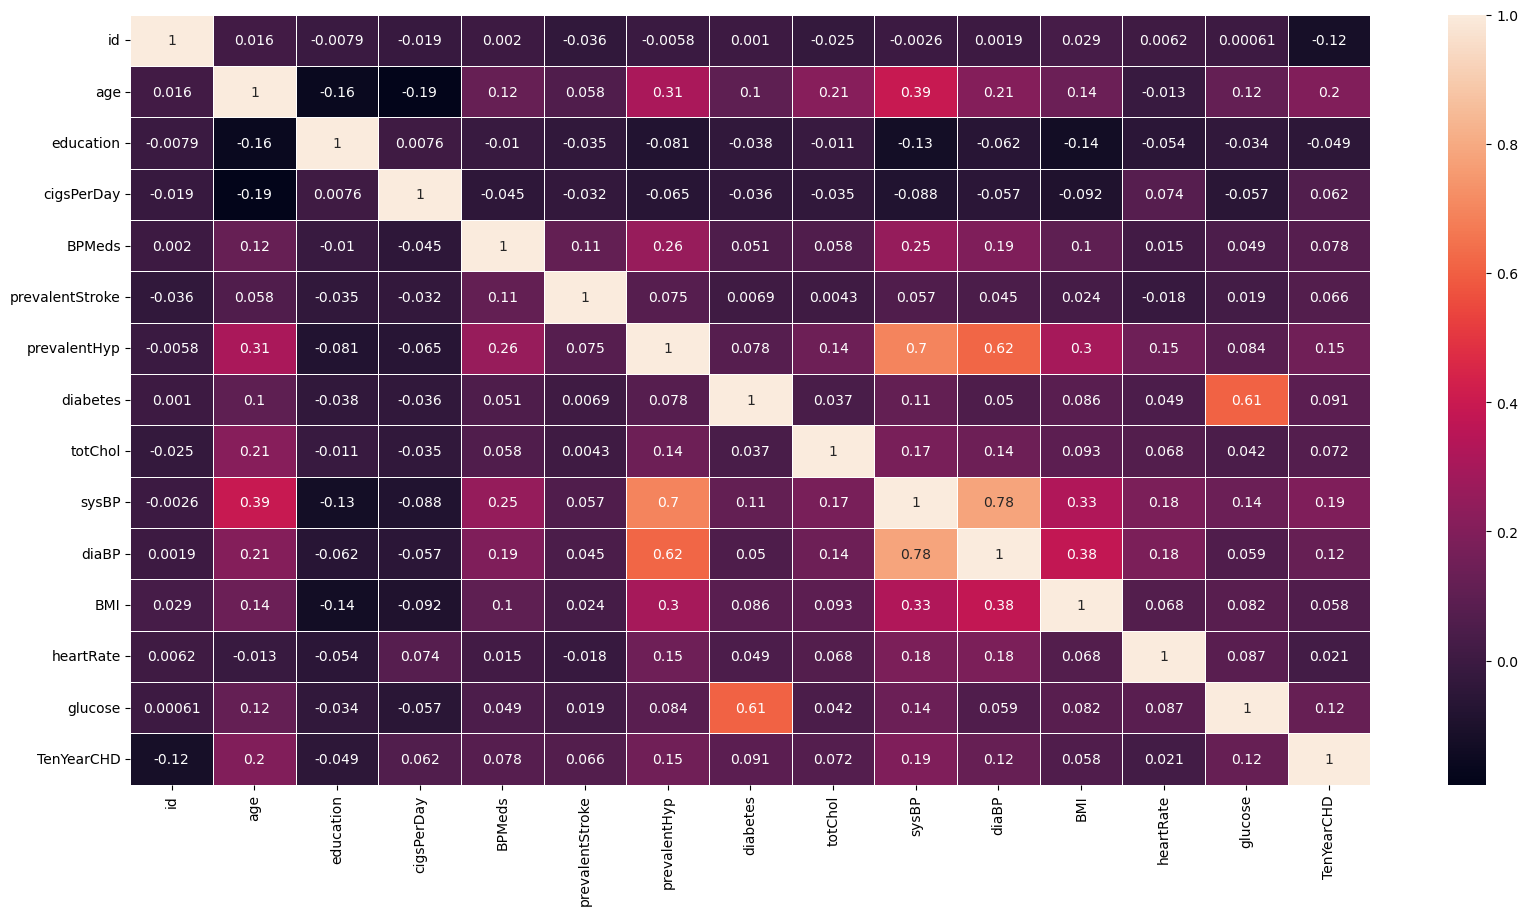

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), linewidths = 0.5, annot = True)

In [9]:
df.corr()["TenYearCHD"].sort_values(ascending = False)

TenYearCHD         1.000000
age                0.196314
sysBP              0.193274
prevalentHyp       0.150845
glucose            0.120711
diaBP              0.120316
diabetes           0.090898
BPMeds             0.077602
totChol            0.071656
prevalentStroke    0.066101
cigsPerDay         0.061734
BMI                0.058030
heartRate          0.020670
education         -0.048581
id                -0.121393
Name: TenYearCHD, dtype: float64

In [10]:
#i'm going to drop id and education 

columns_to_drop = ["id", "education"]
df = df.drop(columns=columns_to_drop)

In [11]:
#one hot encoding 
columns_to_encode = ['sex', 'is_smoking']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [12]:
# Let's split ourdata into our features!!

X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [13]:
#now i'm seperatng for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#the task asked to apply the logistic regression model so that's what i'm going to do :)
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\beit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.8891509433962265
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       751
         1.0       1.00      0.03      0.06        97

    accuracy                           0.89       848
   macro avg       0.94      0.52      0.50       848
weighted avg       0.90      0.89      0.84       848



2-Use a confusion matrix to validate your model.

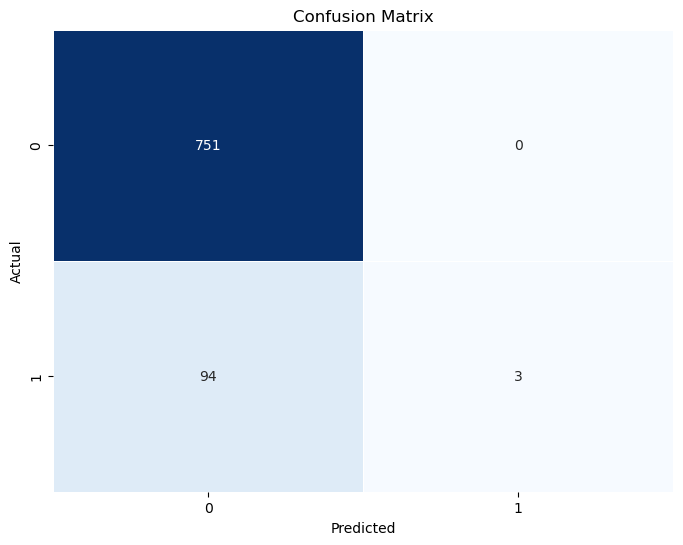

In [17]:
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3-Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

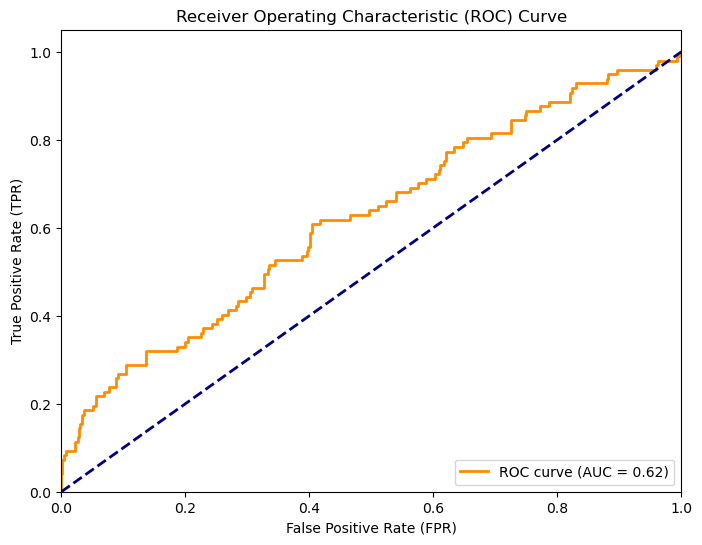

AUC: 0.62


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_prob = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print('AUC: {:.2f}'.format(roc_auc))

So basically:

*ROC Curve: Shows how well a model distinguishes between things.

*AUC: A number that tells you how good the model is at distinguishing. Higher is better, 1 is perfect.